In [2]:
import os
import pandas as pd
import numpy as np
from os import path
import shutil
import math

# Data load

In [3]:
folder = r'D:\OFFIS\Green\Results'

In [4]:
df = pd.read_excel(r'D:\OFFIS\Green\MergeResults.xlsx',skiprows=[0], usecols = [5, 10], sheet_name = 0)
#df = pd.read_excel(r'D:\OFFIS\Green\MergeResults.xlsx', sheet_name = 0)

In [5]:
print(df.shape)

(20297, 2)


In [7]:
from pandasgui import show
gui = show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
PandasGUI WARNING — pandasgui.utility — In df, converted column names to string: 4251
c:\python38\lib\site-packages\pandas\core\apply.py:507: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [6]:
oneItemProcessing = False 

In [ ]:
counterFolders = 0
countExcelFiles = 0  
data=[]

for root, dirs, files in os.walk(folder):
    for file in files:
        path = os.path.join(root, file)
        print(path)
        filename = os.path.basename(path)
         
        df1 = pd.read_excel(folder +'\\' + filename, skiprows=[0], usecols = [5, 10], sheet_name = 0) 
        #df1 = pd.read_excel(folder +'\\' + filename, usecols = [5, 10], sheet_name = 0) 
        print(df1)
       
                       
        data.append(df1)
            
        countExcelFiles += 1

        if oneItemProcessing:
            break
    
print("Number of processed excel files: ", countExcelFiles)
dfs=pd.append(data, ignore_index=True)
oneItemProcessing = True 

In [ ]:
print(dfs)

In [ ]:
dfs.drop_duplicates()

In [ ]:
print(dfs)

In [12]:
print(df.iloc[:, 1])

0        731
1        831
2        931
3         31
4        131
        ... 
20293    645
20294    745
20295    845
20296    945
20297     45
Name: Unnamed: 1, Length: 20298, dtype: int64


In [ ]:
print(df.iloc[:, :9])

In [9]:
x= df.iloc[:, 0]
y= df.iloc[:, 1]

In [10]:
xp=np.array(x)
xpn=xp.reshape(-1,1)
print(xpn.shape)

(20297, 1)


In [9]:
print(y.shape)

(20297,)


<AxesSubplot:>

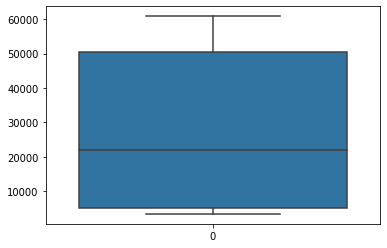

In [49]:
import seaborn as sns
sns.boxplot(x)


# KNN algorithm

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(xpn,y)

KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.predict([[60000]])

array(['Diagonal-Engraving'], dtype=object)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xpn,y)
print(logreg.predict([[4300]]))

['X-Engraving']


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xpn,y, test_size=0.10, random_state=20)

In [35]:
print(X_test.shape)

(2030, 1)


In [36]:
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(predictions)

['Idle' 'X-Engraving' 'Idle' ... 'Diagonal-Engraving' 'Y-Movement'
 'X-Engraving']


In [37]:
print(Y_test)

4369            X-Engraving
8358            Y-Engraving
787                    Idle
19802                  Idle
522             X-Engraving
                ...        
12325    Diagonal-Engraving
19943           X-Engraving
16384           Y-Engraving
11801                  Idle
10470           X-Engraving
Name: Idle, Length: 2030, dtype: object


# Performance

In [39]:
from sklearn import metrics
performance = metrics.accuracy_score(Y_test, predictions)
print(performance)

0.7280788177339902


In [40]:
k_values={}
k=1

while k<=50:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    performance = metrics.accuracy_score(Y_test, predictions)
    k_values[k-1]= round(performance,4)
    k +=1
    
print(k_values)

{0: 0.7281, 1: 0.666, 2: 0.5921, 3: 0.6153, 4: 0.6739, 5: 0.668, 6: 0.6512, 7: 0.6552, 8: 0.664, 9: 0.6621, 10: 0.6547, 11: 0.6576, 12: 0.6596, 13: 0.6635, 14: 0.6581, 15: 0.6586, 16: 0.6576, 17: 0.6547, 18: 0.6547, 19: 0.6542, 20: 0.6567, 21: 0.6532, 22: 0.6493, 23: 0.6473, 24: 0.6478, 25: 0.6453, 26: 0.6478, 27: 0.6389, 28: 0.6463, 29: 0.6453, 30: 0.6429, 31: 0.6414, 32: 0.6443, 33: 0.6374, 34: 0.6419, 35: 0.6404, 36: 0.6448, 37: 0.6453, 38: 0.6478, 39: 0.6458, 40: 0.6478, 41: 0.6438, 42: 0.6473, 43: 0.6493, 44: 0.6478, 45: 0.6473, 46: 0.6498, 47: 0.6468, 48: 0.6433, 49: 0.6443}


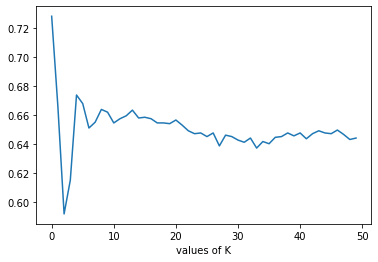

In [41]:
import matplotlib.pyplot as plt

plt.plot(list(k_values.keys()), list(k_values.values()))
plt.xlabel("values of K")
plt.ylabel=("performance")
plt.show()

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
#print(logreg.predict_proba([[51067]]))

predictions_logreg = logreg.predict(X_test)
performance_logreg = metrics.accuracy_score(Y_test, predictions_logreg)
print(performance_logreg)

0.3103448275862069


# Neural Network

###### Before giving inputs to neural network, classification step is needed here. Also data preparation step is required to make the states mapped with numbers.

In [43]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [44]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(xpn, train_size=0.9)
Y_train, Y_test = train_test_split(y, train_size=0.9)

In [45]:
print(X_train.shape[0])

18267


In [46]:
from tensorflow import keras 
from keras.layers import Input, Dense

In [47]:
col_num = X_train.shape[1]
input_dim = Input(shape=(col_num,))

In [48]:
model = keras.Sequential(
    [
        tf.layers.Dense(1, activation="relu", name="layer1"),
        tf.layers.Dense(3, activation="relu", name="layer2"),
        tf.layers.Dense(1, activation="sigmoid", name="layer3"),
    ]
)

model.compile(optimizer='adam',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])



#model.build()

AttributeError: module 'tensorflow' has no attribute 'layers'

In [ ]:
history = model.fit(X_train, Y_train, epochs=1, validation_data=(X_test, Y_test))

c:\python38\lib\site-packages\pandas\core\apply.py:507: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [ ]:
a = model.predict(X_test) 